# Effects of "Peeking" in A/B testing

You've designed your test and it's now running in market. You may also have implemented some type of monitoring to make sure that the test is being executed properly and there are no adverse consequences. 

There is a temptation to peek at your results and stop the test if you've reached statistical significance. If you've gotten the result why spend more money running the test? Unfortunately this practice invalidates the signifiance level and leads to more false positives that you've indicated a tolerable

## Example: Testing a new email campaign

You want to alert customers to an unpayed bill. Customers will recieve an email when they are 30 days overdue and have some probability `p` of pay off their outstanding balance. You're testing a more strongly worded email which you hope will raise `p`

$$
H_{0} : \mu_{a} = \mu_{b}
\\
H_{A} : \mu_{a} > \mu_{b}
$$

### Test Parameters

To demonstrate false posiitive rates we will assume that $H_{0}$ is true, but the researcher does not know this. The researcher will reject the $H_{0}$ at a signifiance level of alpha=0.05 (Confidence of 95%).

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

In [2]:
mu_a = .1
mu_b = mu_a

alpha = .05
n = 10000 # sample size

In [3]:
np.zeros(0)

array([], dtype=float64)

## One simulated test

Lets say we plan on running a test where `n=10000`. The business calculates that this will be really expensive so we want to check in every 500 samples to see if we achieved a significant result. If yes we'll stop the test.

In [4]:
peek = 100
data_A = np.zeros(0)
data_B = np.zeros(0)
p_val = np.zeros(int(n/peek))

for i, samples in enumerate(np.arange(0, n, peek)):
    
    # collect sample
    data_A = np.concatenate((data_A, np.random.binomial(1, mu_a, size=peek)))
    data_B = np.concatenate((data_B, np.random.binomial(1, mu_b, size=peek)))
    
    p_val[i] = stats.ttest_ind(data_A, data_B)[1]

In [5]:
results = pd.DataFrame({'samples': np.arange(peek, n+peek, peek),
             'p-value':p_val})

Text(0.5, 1.0, 'Fluctuation of p-value during test')

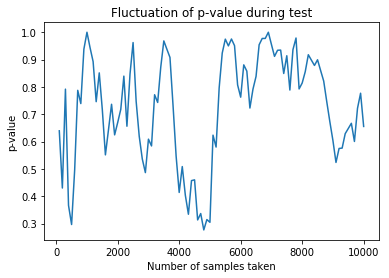

In [9]:
plt.plot(results['samples'], results['p-value'])
plt.ylabel('p-value')
plt.xlabel('Number of samples taken')
plt.title('Fluctuation of p-value during test')

## Degredation of Significance

Let's say we repeat this experiment many times. If we find a signficant effect we will stop the experiment and declare it a succes. We should find that our false positive rate (Type I error) is only .05. 

In [13]:
peek = 100
experiments = 100
FP = 0
alpha= .05

for j in range(experiments):
    data_A = np.zeros(0)
    data_B = np.zeros(0)
    p_val = np.zeros(int(n/peek))

    for i, samples in enumerate(np.arange(0, n, peek)):

        # collect sample
        data_A = np.concatenate((data_A, np.random.binomial(1, mu_a, size=peek)))
        data_B = np.concatenate((data_B, np.random.binomial(1, mu_b, size=peek)))

        p_val = stats.ttest_ind(data_A, data_B)[1]
        if p_val <= alpha:
            FP += 1
            break
            
print("False Positive Rate {}".format(FP/experiments))

False Positive Rate 0.36


### False Positive Rate with peeking 36% instead of 5%

Because we pre-maturely stopped the test when we found signficance the p=0.05 threshold for signficiance is no longer valid. Instead we find that p=0.05 with peeking every 100 samples increases the false positive rate to 36%! 

The issue of peeking parallels that of multiple comparisons. We are essentially running multiple sequential tests. There are ways to approach this sequential testing that produce valid results which are discussed in a follow-on blog